# ЛАБОРАТОРНАЯ РАБОТА 5

## РЕШЕНИЕ СИСТЕМ ЛИНЕЙНЫХ АЛГЕБРАИЧЕСКИХ УРАВНЕНИЙ ИТЕРАЦИОННЫМИ МЕТОДАМИ

Задача 5.1. Дана система уравнений $Ax=b$. Найти решение системы с помощью метода Гаусса. Выполнить $10$ итераций по методу Зейделя. Принимая решение, полученное с помощью метода Гаусса за точное, найти величину абсолютной погрешности итерационного решения.

ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:

1. Задать матрицу системы $A$ и вектор правой части $b$. Используя встроенную функцию ```lsolve```, найти решение системы $Ax=b$ с помощью метода Гаусса.

2. Преобразовать систему $Ax=b$ к виду $x=Bx+c$, удобному для итераций. Проверить выполнение достаточного условия сходимости итерационных методов $\Vert B \Vert_{\infty} < 1$.

3. Используя функцию ```zeid``` (см. ПРИЛОЖЕНИЕ), выполнить $10$ итераций по методу Зейделя; взять любое начальное приближение. Принимая решение, полученное в п. 1 за точное, найти величину абсолютной погрешности итерационного решения (использовать норму $\Vert \cdotp \Vert_{\infty}$).

4. Взять другое начальное приближение. Объяснить полученные результаты.

Задача 5.2. Для системы уравнений $Ax=b$ из задачи 5.1 найти решение по методу Зейделя с точностью $\varepsilon=10^{-6}$, взяв любое начальное приближение. Для этого модифицировать функцию ```zeid``` так, чтобы решение вычислялось с заданной точностью $\varepsilon$. Предусмотреть подсчет количества итераций, потребовавшихся для достижения точности $\varepsilon$.

In [1]:
import numpy as np
import matplotlib.image
import matplotlib.pyplot as plt
import math
from numpy import linalg
%matplotlib inline
from IPython.display import Image
from IPython.core.display import HTML 

### Алгоритм метода Зейделя

In [2]:
Image(url= "https://pp.userapi.com/c834400/v834400831/f09dd/en0_oIT1p1Y.jpg", width=600, height=600)

# ТЕОРИЯ

## Метод простой итерации

### 1. Приведение системы к виду, удобному для итераций

Для того, чтобы применить метод простой итерации к решению СЛАУ $\large Ax=b \qquad (1)$ 

с квадратной невырожденной матрицей $A$, необходимо предварительно преобразовать эту систему к виду $\large x = Bx + c$.

Здесь $B$ - квадратная матрица с элементами $\large b_{ij} \quad (i, j = 1, 2, \ldots, m); c$ - вектор-столбец с элементами $c_i (i = 1, 2, \ldots, m)$.

В развернутой форме эта система имеет вид:

$\large x_{1} = b_{11}x_{1} + b_{12}x_{2} + b_{13}x_{3} + ... + b_{1m}x_{m} + c_{1},$

$\large x_{2} = b_{21}x_{1} + b_{22}x_{2} + b_{23}x_{3} + ... + b_{2m}x_{m} + c_{2},$

$\large \ldots \quad \ldots \quad \ldots \quad \ldots \quad \ldots \quad \ldots  \quad \ldots\quad \ldots\quad \ldots \quad \ldots\quad \ldots\quad \ldots(2)$

$\large x_{n} = b_{m1}x_{1} + b_{m2}x_{2} + b_{m3}x_{3} + ... + b_{mm}x_{m} + c_{m}.$

Самый простой способ приведения системы к виду, удобному для итераций, состоит в следующем. 

* из первого уравнения системы выражаем $x_{1}$

$\large x_{1} = a_{11}^{-1}(b_{1} - a_{12}x_{1} - a_{13}x_{2} - a_{13}x_{3} - ... - a_{1m}x_{m})$,

* из второго уравнения системы выражаем $x_{2}$

$\large x_{2} = a_{22}^{-1}(b_{2} - a_{21}x_{1} - a_{23}x_{2} - a_{33}x_{3} - ... - a_{3m}x_{m})$.

В результате получим систему:

$$\large x_{1} = \qquad\quad b_{1,2}x_{2} + b_{1,3}x_{3} + \dotsb + b_{1, n}x_{n} + c_{1},$$

$$\large x_{2} = b_{2,1}x_{1} + \qquad\quad b_{2,3}x_{3} + \dotsb + b_{2, n}x_{n} + c_{2},$$

$$\large x_{3} = b_{3,1}x_{1} + b_{3,2}x_{2}  \qquad\quad + \dotsb + b_{2, n}x_{n} + c_{2},$$

$$\dotsb \quad \dotsb \quad \dotsb \quad \dotsb \quad \dotsb \qquad\qquad (2) $$

$$\large x_{n} = b_{n,1}x_{1} + b_{n,2}x_{2} + b_{n,3}x_{3} + ... \qquad\quad +c_{n},$$


в которой на главной диагонали стоят *нулевые* элементы.Остальные выражаются по формулам: $b_{i, j} = \frac{-a_{i, j}}{a_{i, i}}, c_{i} = \frac{b_{i}}{a_{i, i}}, \quad i,j = 1, ..., n, i\neq j$.

Конечно для выполнения данного преобразования *необходимо*, чтобы диагональные элементы матрицы А были *ненулевыми*.

### 2. Описание метода простой итерации

Выберем начальное приближение $\large x^{(0)} = (x_{1}^{(0)}, x_{2}^{(0)}, \ldots, x_{m}^{(0)})$. Подставляя его в правую часть системы $(2)$ и вычисляя полученное выражение, находим первое приближение

$$\large x^{(1)} = B x^{(0)} + c.$$

Подставляя приближение $x^{(1)}$ в правую часть системы $(2)$, получаем:

$$\large x^{(2)} = B x^{(1)} + c.$$

Продолжая этот процесс далее, получаем последовательность $\large x^{(0)}, x^{(1)}, \ldots, x^{(n)}, \ldots$ приближений, вычисляемых по формуле

$$\large x^{(k+1)} = B x^{(k)} + c, \quad k = 0, 1, 2, \ldots .$$


### 3. Апостериорная оценка погрешности

В качестве критеория окончания итерационного процесса может быть использовано неравенство

$\large \Vert x^{(n)} - x^{(n-1)}\Vert < \varepsilon_1, \quad \varepsilon_1 = \cfrac{1 - \Vert B \Vert}{\Vert B \Vert} \varepsilon$.

## Метод Зейделя

### 1. Описание метода

Пусть система $\large Ax=b$ приведена к виду 

$\large \begin{equation*}
\begin{cases}
x_1 = \qquad \quad b_{12} x_2 + b_{13} x_3 + \ldots + b_{1,m-1} x_{m-1} + b_{1m} x_{m} +  c_1,\\
x_2 = b_{21} x_1 \qquad \quad + b_{23} x_3 + \ldots + b_{2,m-1} x_{m-1} + b_{2m} x_{m} +  c_2,\\
x_3 = b_{31} x_1 + b_{32} x_2 \qquad \quad  + \ldots + b_{3,m-1} x_{m-1} + b_{3m} x_{m} + c_3,\\
\ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots \ldots  \qquad \qquad \qquad \qquad \qquad \qquad (3)\\
x_m = b_{m1} x_1 + b_{m2} x_2 + b_{m3} x_3 +\ldots + b_{m,m-1} x_{m-1}  \qquad + c_m,\\
\end{cases}
\end{equation*}$

с коэффициентами, вычисленными по формулам 

$$\large b_{ij} = -\cfrac{a_{ij}}{a_{ii}}, \quad c_{i} = \cfrac{b_{i}}{a_{ii}} \quad (i, j = 1, 2, \ldots, m, \quad j \ne i). \quad \qquad \qquad \qquad \quad (4)$$

Метод Зейделя можно рассматривать как модификацию метода Якоби. Основная идея модификации состоит в том, что при вычислении очередного $\large (k+1)$-го приближения к неизвестному $\large x_i$ при $\large i>1$ используют уже найденные $\large (k+1)$-е приближения к неизвестным $\large x_1, \ldots, x_{i-1}$, а не $\large k$-е приближения, как в методе Якоби. Новые значения $\large x^{(k)}$ используются здесь сразу же по мере получения, в то время как в методе Якоби они не используются до следующей итерации.

На $\large (k+1)$-ой итерации компоненты приближения $\large x^{k+1}$ вычисляются по формулам:

$\large x_{1} = \quad\quad\quad\quad b_{12}x_{2}^{(k)} + b_{13}x_{3}^{(k)} + \ldots + b_{1m}x_{m}^{(k)} + c_{1},$

$\large x_{2} = b_{21}x_{1}^{(k+1)} \quad\quad\quad + b_{23}x_{3}^{(k)} + \ldots + b_{2m}x_{m}^{(k)} + c_{2},$

$\large x_{3} = b_{31}x_{1}^{(k+1)} + b_{32}x_{2}^{(k+1)}  \quad \quad + \ldots + b_{3m}x_{m}^{(k)} + c_{3},$

$\large \ldots \quad \ldots \quad \ldots \quad \ldots \quad \ldots \quad \ldots \quad \ldots \quad \ldots \quad \ldots \quad \ldots$

$\large x_{m} = b_{m1}x_{1}^{(k+1)} + b_{m2}x_{2}^{(k+1)} + b_{m3}x_{3}^{(k+1)} + \ldots \quad + c_{m}.$

Введем верхнюю и нижнюю треугольные матрицы:

$ \large B_{1} = 
\begin{bmatrix}
    0       & 0 & 0 & \dots & 0 \\
    b_{21}       & 0 & 0 & \dots & 0 \\
    b_{31}       & b_{32} & 0 & \dots & 0 \\
    \ldots  & \ldots & \ldots  & \dots & \ldots \\
    b_{m1}       & b_{m2} & b_{m3} & \dots & 0\\
\end{bmatrix}, \qquad $
$ \large B_{2} = 
\begin{bmatrix}
    0     & b_{12} & b_{13} & \dots & b_{1m}\\
    0     & 0       & b_{23} & \dots & b_{2m} \\
    0     & 0       & 0       & \dots & b_{3m} \\
    \ldots  & \ldots & \ldots  & \dots & \ldots \\
    0     & 0       & 0       & \dots & 0 \\
\end{bmatrix}$

Тогда расчетные формулы

$$\large x^{(k+1)} = B_1 x^{(k+1)} + B_2 x^{(k)} + c.$$

Заметим, что $B = B_1 + B_2$ и поэтому решение $\bar{x}$ исходной системы удовлетворяет равенству

$$\\large bar{x} = B_1 \bar{x} + B_2 \bar{x} + c.$$


### 2. Достаточные условия сходимости

#### Теорема
Пусть $\large\Vert B \Vert < 1$, где $\large\Vert B \Vert$ - одна из норм $\large\Vert B \Vert_{\infty}, \Vert B \Vert_{1}$. Тогда при любом выборе начального приближения $x^{(0)}$ метод Зейделя сходится со скоростью геометрической прогрессии, знаменатель которой $\large q \le \Vert B \Vert$.

#### Теорема
Пусть выполнено условие

$$\large \Vert B_1 \Vert + \Vert B_2 \Vert < 1.$$

Тогда при любом выборе начального приближения метод Зейделя сходится и верна оценка погрешности

$$\large \Vert x^{(n)} - \bar{x}\Vert \le q^n \Vert x^{(0)} - \bar{x}\Vert,$$

где $\large q = \cfrac{\Vert B_2 \Vert}{1 - \Vert B_1 \Vert}< 1$.

Особо выделим часто встречающийся на практике случай систем с симметричными положительно определенными матрицами.

#### Теорема
Пусть $\large A$ - симметричная положительно определенная матрица. Тогда при любом выборе начального приближения $\large x^{(0)}$ метод Зейделя сходится со скоростью геометрической сходимости.


### 3. Апостериорная оценка погрешности

Если выполнено условие $\large \Vert B \Vert < 1$, то для метода Зейделя справедлива апостериорная оценка погрешности

$$\large \Vert x^{(n)} - \bar{x} \Vert \le \cfrac{\Vert B_2 \Vert}{1-\Vert B \Vert} \Vert x^{(n)} - x^{(n-1)} \Vert, \quad n \ge 1.$$

Это неравенство позволяет сфомулировать простой критерий окончания итерационного процесса. Если требуется найти решение с точность $\large \varepsilon > 0$, то итерации метода Зейделя следует вести до выполнения неравенства $\large \cfrac{\Vert B_2 \Vert}{1-\Vert B \Vert} \Vert x^{(n-1)} - x^{(n)} \Vert < \varepsilon$ или эквивалентного ему неравенства

$$\large \Vert x^{(n)} - x^{(n-1)} \Vert < \varepsilon_2,$$

где $\large \varepsilon_2 = \cfrac{1-\Vert B \Vert}{\Vert B_2 \Vert} \varepsilon$.

### 4. Геометрическая интерпретация метода

Приведем геометрическую интерпретацию метода Зейделя при $\large m = 2$, т.е. когда он применяется для решения системы

$\large \begin{equation*}
\begin{cases}
a_{11} x_1 + a_{12} x_2 = b_1,\\
a_{21} x_1 + a_{22} x_2 = b_2.\\
\end{cases}
\end{equation*}$

Первое уравнение задает на плоскости $\large x_1 O x_2$ прямую $\large l_1$, второе - прямую $\large l_2$ (см. рис.).

Расчетные формулы метода принимают вид:

$\large x_{1}^{(k+1)} = \quad\quad\qquad b_{12} x_{2}^{(k)} + c_1,$

$\large x_{2}^{(k+1)} = b_{21} x_{1}^{(k+1)}\qquad\quad+ c_2,$

где

$ b_{12} = -\cfrac{a_{12}}{a_{11}}, \quad c_{1} = \cfrac{b_{1}}{a_{11}}, \quad b_{21} = -\cfrac{a_{21}}{a_{22}}, \quad c_{2} = \cfrac{b_{2}}{a_{22}}.$

Пусть приближение $\large x^{k}$ уже найдено. Тогда при определении $\large x_1^{(k+1)}$ координата $\large x_2 = x_2^{(k)}$ фиксируется и точка $\large x$ перемещается параллельно оси $\large O x_1$ до пересечения с прямой $\large l_1$. Координата $\large x_1$ точки пересечения принимается за $\large x_1^{(k+1)}$. Затем точка $\large x$ перемещается вдоль прямой $\large x_1 = x_1^{(k+1)}$ до пересечения с прямой $\large l_2$. Координата $\large x_2$ точки пересечения принимается за $\large x_2^{(k+1)}$.

На рисунке приведены геометрические иллюстрации, отвечающие сходящемуся и расходящемуся итерационному процессу Зейделя. Видно, что характер сходимости может измениться при перестановке уравнений.

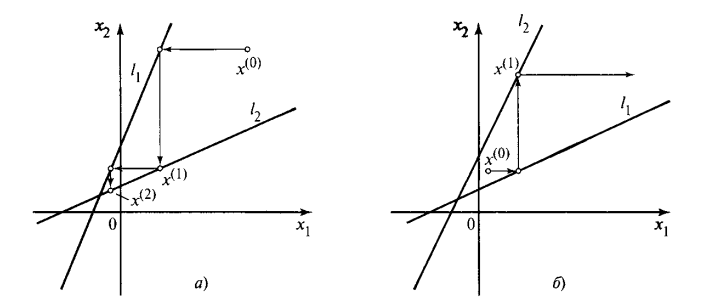

In [3]:
PATH = "/Users/Alexandra/YandexDisk/3 курс/34 Численные методы/ЛР/ЛР5 (iteration method for linear systems)/"
Image(filename = PATH + "zeid_geom.png", width=600, height=600)

1) Задать матрицу системы  $A$  и вектор правой части $b$.

In [4]:
A = np.array([[4.95, 1.12, 2.9, 0.66], [8.91, 19.9, -4.0, 6.93], [-2.97, 2.2, -5.8, 0], [5.94, 1.3, 10.5, 17.82]])
# вектор-строка
b = np.array([-3.41, 50.33, 19.49, -45.88])
# вектор-столбец
b_row = b.reshape(-1, 1)

In [5]:
A

array([[  4.95,   1.12,   2.9 ,   0.66],
       [  8.91,  19.9 ,  -4.  ,   6.93],
       [ -2.97,   2.2 ,  -5.8 ,   0.  ],
       [  5.94,   1.3 ,  10.5 ,  17.82]])

In [6]:
b

array([ -3.41,  50.33,  19.49, -45.88])

### Система уравнений

In [7]:
for i in range(A.shape[0]):
    row = ["({0:3g})*x{1}".format(A[i, j], j + 1) for j in range(A.shape[1])]
    print("[{0}] = [{1:3g}]".format(" + ".join(row), b[i]))

[(4.95)*x1 + (1.12)*x2 + (2.9)*x3 + (0.66)*x4] = [-3.41]
[(8.91)*x1 + (19.9)*x2 + ( -4)*x3 + (6.93)*x4] = [50.33]
[(-2.97)*x1 + (2.2)*x2 + (-5.8)*x3 + (  0)*x4] = [19.49]
[(5.94)*x1 + (1.3)*x2 + (10.5)*x3 + (17.82)*x4] = [-45.88]


Используя встроенную функцию ```np.linalg.solve```, найти решение системы  $Ax=b$  с помощью метода Гаусса.

In [8]:
x_Gauss = np.linalg.solve(A, b)
x_Gauss

array([ 0.77777778,  2.        , -3.        , -1.21212121])

2) Преобразовать систему $Ax=b$ к виду $x=Bx+c$, удобному для итераций. Проверить выполнение достаточного условия сходимости итерационных методов $\Vert B \Vert_{\infty} < 1$.

In [9]:
c = np.zeros_like(b)
B1 = np.zeros((4, 4))
B2 = np.zeros((4, 4))
for i in range(A.shape[0]): # считаем коэфф-ты по формулам (2) из теории выше
    B1[i, :i] = A[i, :i] / A[i, i]
    B2[i, i+1:] += A[i, i + 1:] / A[i, i]
    c[i] = b[i] / A[i, i]

In [10]:
B1

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.44773869,  0.        ,  0.        ,  0.        ],
       [ 0.51206897, -0.37931034,  0.        ,  0.        ],
       [ 0.33333333,  0.07295174,  0.58922559,  0.        ]])

In [11]:
B2

array([[ 0.        ,  0.22626263,  0.58585859,  0.13333333],
       [ 0.        ,  0.        , -0.20100503,  0.34824121],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [12]:
c

array([-0.68888889,  2.52914573, -3.36034483, -2.57463524])

In [13]:
B = B1 + B2
B

array([[ 0.        ,  0.22626263,  0.58585859,  0.13333333],
       [ 0.44773869,  0.        , -0.20100503,  0.34824121],
       [ 0.51206897, -0.37931034,  0.        ,  0.        ],
       [ 0.33333333,  0.07295174,  0.58922559,  0.        ]])

#### Проверим достаточное условие

In [14]:
np.linalg.norm(B1 + B2, ord = np.inf)

0.99698492462311561

$\Vert B \Vert_{\infty} = 0.99698492462311561 < 1 \Rightarrow$ достаточное условие выполнено  

3) Используя функцию ```zeid``` (см. ПРИЛОЖЕНИЕ), выполнить $10$ итераций по методу Зейделя; взять любое начальное приближение. 

In [43]:
def Seidel_Method(B, c, k, x):
    for it_count in range(1, k):
        x_new = np.zeros_like(x)
        print("Итерация {0}: {1}".format(it_count, x))
        for i in range(B.shape[0]):
            s1 = np.dot(B[i, :i], x_new[:i])
            s2 = np.dot(B[i, i + 1:], x[i + 1:])
            x_new[i] = (c[i] - s1 - s2)
        x = x_new
    return x

In [44]:
B = B1 + B2
n = 4
k = 11
x0 = np.zeros_like(b)
x_iter1 = Seidel_Method(B, c, k, x0)
x_iter1

Итерация 1: [ 0.  0.  0.  0.]
Итерация 2: [-0.68888889  2.83758794 -1.93125975 -1.41406493]
Итерация 3: [-0.01094189  2.6382876  -2.35401204 -1.37641148]
Итерация 4: [ 0.27680493  2.4113644  -2.58743258 -1.31823529]
Итерация 5: [ 0.45714377  2.26344167 -2.73588712 -1.2800838 ]
Итерация 6: [ 0.57249966  2.16866635 -2.83090655 -1.25563386]
Итерация 7: [ 0.64635173  2.10798606 -2.89174057 -1.23997953]
Итерация 8: [ 0.69363429  2.0691364  -2.93068858 -1.22995707]
Итерация 9: [ 0.72390622  2.0442635  -2.95562444 -1.22354034]
Итерация 10: [ 0.74328735  2.02833902 -2.97158924 -1.21943213]


array([ 0.75569582,  2.01814362, -2.98181045, -1.21680191])

Принимая решение, полученное в п. 1 за точное, найти величину абсолютной погрешности итерационного решения (использовать норму $\Vert \cdotp \Vert_{\infty}$).

In [50]:
x_zeid = np.array([0.72390622,  2.0442635,  -2.95562444, -1.22354034])
np.linalg.norm(x_Gauss - x_zeid, ord = np.inf)

0.053871557777773083

Относительная погрешность:

In [51]:
np.linalg.norm(x_Gauss - x_zeid, ord = np.inf)/np.linalg.norm(x_Gauss, ord = np.inf)

0.017957185925924379

4) Взять другое начальное приближение. Объяснить полученные результаты.

In [47]:
x1 = np.array([0.5, 2, -2.5, -1]) # прям близко к истинному
x_iter2 = Seidel_Method(B, c, k, x1)
x_iter2

Итерация 1: [ 0.5  2.  -2.5 -1. ]
Итерация 2: [ 0.45656566  2.17045226 -2.77086294 -1.25249872]
Итерация 3: [ 0.61035255  2.13508156 -2.8630289  -1.24687411]
Итерация 4: [ 0.6716019   2.08717332 -2.91256488 -1.23460771]
Итерация 5: [ 0.7098273   2.05582968 -2.94402789 -1.22652412]
Итерация 6: [ 0.73427426  2.03574457 -2.96416491 -1.22134262]
Итерация 7: [ 0.74992534  2.02288492 -2.97705715 -1.21802508]
Итерация 8: [ 0.75994569  2.01465171 -2.98531119 -1.21590107]
Итерация 9: [ 0.76636106  2.00938053 -2.99059572 -1.21454121]
Итерация 10: [ 0.7704684   2.00600574 -2.99397906 -1.21367058]


array([ 0.77309806,  2.00384508, -2.99614518, -1.21311317])

Абсолютная погрешность:

In [48]:
np.linalg.norm(x_Gauss - x_iter2, ord = np.inf)

0.0046797140529316605

Относительная погрешность:

In [49]:
np.linalg.norm(x_Gauss - x_iter2, ord = np.inf)/np.linalg.norm(x_Gauss, ord = np.inf)

0.001559904684310555

Задача 5.2. Для системы уравнений $Ax=b$ из задачи 5.1 найти решение по методу Зейделя с точностью $\varepsilon=10^{-6}$, взяв любое начальное приближение. Для этого модифицировать функцию ```zeid``` так, чтобы решение вычислялось с заданной точностью $\varepsilon$. Предусмотреть подсчет количества итераций, потребовавшихся для достижения точности $\varepsilon$.

In [35]:
def Seidel_Method_Modified(B, c, x, eps):
    it_count = 0
    x_new = np.zeros_like(x)
    # новая эпсилон
    eps2 = ((1 - np.linalg.norm(B, ord = np.inf))*eps)/(np.linalg.norm(B2, ord = np.inf))
    print(np.linalg.norm(x - x_new, ord = 2), eps2)
    while True:
        x_new = np.copy(x)
        print("Итерация {0}: {1}".format(it_count, x))
        for i in range(B.shape[0]):
            s1 = np.dot(B[i, :i], x_new[:i])
            s2 = np.dot(B[i, i + 1:], x[i + 1:])
            x_new[i] = (c[i] - s1 - s2) #/ B[i, i]
        it_count += 1
        if np.allclose(x, x_new, eps2):
            break
        x = x_new
    return x

In [36]:
x_mod = Seidel_Method_Modified(B, c, x1, 1e-6)

3.39116499156 3.18902203324e-09
Итерация 0: [ 0.5  2.  -2.5 -1. ]
Итерация 1: [ 0.45656566  2.17045226 -2.77086294 -1.25249872]
Итерация 2: [ 0.61035255  2.13508156 -2.8630289  -1.24687411]
Итерация 3: [ 0.6716019   2.08717332 -2.91256488 -1.23460771]
Итерация 4: [ 0.7098273   2.05582968 -2.94402789 -1.22652412]
Итерация 5: [ 0.73427426  2.03574457 -2.96416491 -1.22134262]
Итерация 6: [ 0.74992534  2.02288492 -2.97705715 -1.21802508]
Итерация 7: [ 0.75994569  2.01465171 -2.98531119 -1.21590107]
Итерация 8: [ 0.76636106  2.00938053 -2.99059572 -1.21454121]
Итерация 9: [ 0.7704684   2.00600574 -2.99397906 -1.21367058]
Итерация 10: [ 0.77309806  2.00384508 -2.99614518 -1.21311317]
Итерация 11: [ 0.77478166  2.00246175 -2.99753201 -1.2127563 ]
Итерация 12: [ 0.77585956  2.0015761  -2.99841991 -1.21252782]
Итерация 13: [ 0.77654967  2.00100907 -2.99898837 -1.21238153]
Итерация 14: [ 0.7769915   2.00064604 -2.99935232 -1.21228788]
Итерация 15: [ 0.77727438  2.00041362 -2.99958533 -1.21222792

Абсолютная погрешность:

In [37]:
np.linalg.norm(x_Gauss - x_mod, ord = np.inf)

2.7629523668970535e-08

Относительная погрешность:

In [38]:
np.linalg.norm(x_Gauss - x_mod, ord = np.inf)/np.linalg.norm(x_Gauss, ord = np.inf)

9.2098412229901882e-09